In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm, colors, pyplot as plt
from matplotlib.gridspec import GridSpec as gs
import glob, os
import pickle as pk
from scipy import stats

In [2]:
midline_dict = {}
merged_df = []
ref = pd.read_excel('/Volumes/LaCie/QY_data/20211108_QY_Rv1830_misc/ref.xlsx').set_index('Well')
for f in sorted(glob.glob('/Volumes/LaCie/QY_data/20211108_QY_Rv1830_misc/*/')):
    if 'output' not in f:
        well = f.split('/')[-2]
        df = pd.read_csv(f+'output/data.csv')
        condition = ref.loc[well,'Condition']
        nada = ref.loc[well,'NADA']
        dilution = ref.loc[well,'Dilution']
        time = ref.loc[well,'Time']
        strain = ref.loc[well,'Strain']
        df['Well'] = [well]*len(df)
        df['Row'] = [well[0]]*len(df)
        df['Time'] = [time]*len(df)
        df['Condition'] = [condition]*len(df)
        df['NADA'] = [nada]*len(df)
        df['Dilution'] = [dilution]*len(df)
        df['Strain'] = [strain]*len(df)
        midlines = pk.load(open(f+'output/midline_profile.pk','rb'))
        midline_dict[well] = midlines
        merged_df.append(df)
merged_df = pd.concat(merged_df)
merged_df['width_median'] *= 0.065
merged_df['width_std'] *= 0.065
merged_df['width_max'] *= 0.065
merged_df['area'] *= 0.065**2

In [15]:
cond1 = merged_df['Time']==0
cond2 = merged_df['Dilution']=='-'
cond3 = merged_df['NADA']=='-'
cond4 = merged_df['width_median']<0.75
filtered = merged_df[cond1&cond2&cond3&cond4]

In [16]:
resampled = []
for s in filtered['Strain'].unique():
    resampled.append(filtered[filtered['Strain']==s].sample(400))
subset=pd.concat(resampled)

/Users/jz-rolling/Desktop/OMEGA_GUI/venv/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator


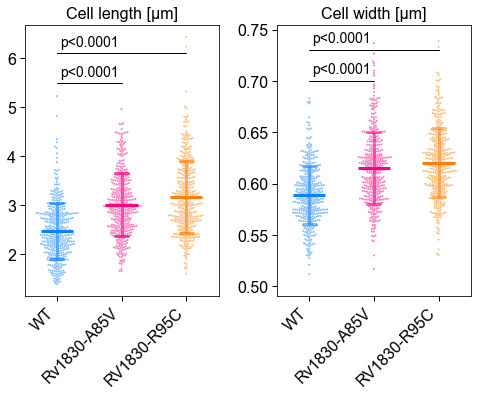

In [139]:
r7_color = np.array([253,127,8])/255
r8_color = np.array([251,0,127])/255
wt_color = np.array([14,129,255])/255
color_list = [wt_color,r8_color,r7_color]
sns.set_palette(np.array([wt_color,r8_color,r7_color]))
fig=plt.figure(figsize=(8,5))
grids = gs(1,2,wspace=0.3)
ax1 = fig.add_subplot(grids[:,0])
ax2 = fig.add_subplot(grids[:,1])

sns.swarmplot(data=subset,x='Strain',y='length',ax=ax1,
            order=['WT','Rv1830-R7','Rv1830-R8'],s=2,alpha=0.5)

sns.swarmplot(data=subset,x='Strain',y='width_median',ax=ax2,
            order=['WT','Rv1830-R7','Rv1830-R8'],s=2,alpha=0.5)

for i,strain in enumerate(['WT','Rv1830-R7','Rv1830-R8']):
    strain_data = subset[subset['Strain']==strain]
    lengths = strain_data['length']
    widths = strain_data['width_median']
    ax1.vlines(x=i,
               ymin=lengths.mean()-lengths.std(),
               ymax=lengths.mean()+lengths.std(),color=color_list[i],alpha=0.5,lw=3)
    ax2.vlines(x=i,
               ymin=widths.mean()-widths.std(),
               ymax=widths.mean()+widths.std(),color=color_list[i],alpha=0.5,lw=3)
    
    ax1.hlines(y=lengths.mean(),
               xmin=i-0.25,
               xmax=i+0.25,color=color_list[i],alpha=1,lw=3)
    ax2.hlines(y=widths.mean(),
               xmin=i-0.25,
               xmax=i+0.25,color=color_list[i],alpha=1,lw=3)
    ax1.hlines(y=lengths.mean()-lengths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.7,lw=3,capstyle='round')
    ax1.hlines(y=lengths.mean()+lengths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.7,lw=3,capstyle='round')
    ax2.hlines(y=widths.mean()-widths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.5,lw=3,capstyle='round')
    ax2.hlines(y=widths.mean()+widths.std(),
               xmin=i-0.1,
               xmax=i+0.1,color=color_list[i],alpha=0.5,lw=3,capstyle='round')
ax1.hlines(y=5.5,xmin=0,xmax=1,color='black',lw=1,capstyle='round')
ax1.hlines(y=6.1,xmin=0,xmax=2,color='black',lw=1,capstyle='round')
ax2.hlines(y=0.7,xmin=0,xmax=1,color='black',lw=1,capstyle='round')
ax2.hlines(y=0.73,xmin=0,xmax=2,color='black',lw=1,capstyle='round')
ax1.text(x=0.5,y=5.58,s='p<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax1.text(x=0.5,y=6.18,s='p<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax2.text(x=0.5,y=0.705,s='p<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax2.text(x=0.5,y=0.735,s='p<0.0001',fontname='Arial',fontsize=14,ha='center',va='bottom')
ax1.set_title('Cell length [μm]',fontname='Arial',fontsize=16)
ax2.set_title('Cell width [μm]',fontname='Arial',fontsize=16)
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_xticklabels(['WT','Rv1830-A85V','RV1830-R95C'],rotation=45,ha='right',va='top',fontname='Arial',fontsize=16)
ax1.set_yticklabels([1,2,3,4,5,6,7],fontname='Arial',fontsize=16)
ax2.set_xticklabels(['WT','Rv1830-A85V','RV1830-R95C'],rotation=45,ha='right',va='top',fontname='Arial',fontsize=16)
ax2.set_yticks([0.5,0.55,0.6,0.65,0.7,0.75])
ax2.set_yticklabels(['0.50','0.55','0.60','0.65','0.70','0.75'],fontname='Arial',fontsize=16)
ax1.tick_params('both', length=5, width=1, which='major')
ax2.tick_params('both', length=5, width=1, which='major')
ax2.set_ylim(0.49,0.755)
plt.savefig('/Users/jz-rolling/Desktop/Rv1830_manuscript/figures/length_width.png',
           bbox_inches='tight',dpi=160)
